## Imports

In [ ]:
import pandas as pd
import numpy as np
import functions.visualization_functions as VisualizationFunctions

import warnings
warnings.filterwarnings('ignore')

## Dataset

In [144]:
data_path = 'datasets/telecom_customer_churn.csv'
df_churn = pd.read_csv(data_path)

In [145]:
df_churn.head()

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,...,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,...,Credit Card,65.6,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN
1,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,...,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,...,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,...,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,...,Credit Card,83.9,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability


In [146]:
print(df_churn.columns.tolist())

['Customer ID', 'Gender', 'Age', 'Married', 'Number of Dependents', 'City', 'Zip Code', 'Latitude', 'Longitude', 'Number of Referrals', 'Tenure in Months', 'Offer', 'Phone Service', 'Avg Monthly Long Distance Charges', 'Multiple Lines', 'Internet Service', 'Internet Type', 'Avg Monthly GB Download', 'Online Security', 'Online Backup', 'Device Protection Plan', 'Premium Tech Support', 'Streaming TV', 'Streaming Movies', 'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing', 'Payment Method', 'Monthly Charge', 'Total Charges', 'Total Refunds', 'Total Extra Data Charges', 'Total Long Distance Charges', 'Total Revenue', 'Customer Status', 'Churn Category', 'Churn Reason']


In [147]:
df_churn.shape

(7043, 38)

## Filtrando Dataset

In [ ]:
drop_columns = ['Customer ID', 'City', 'Zip Code', 'Latitude', 'Longitude','Churn Category', 'Churn Reason']
df_churn = df_churn.drop(columns=drop_columns)
df_churn.head()

KeyError: "['Customer ID', 'City', 'Zip Code', 'Latitude', 'Longitude', 'Churn Category', 'Churn Reason'] not found in axis"

In [149]:
df_churn[['Customer Status']].value_counts()

Customer Status
Stayed             4720
Churned            1869
Joined              454
Name: count, dtype: int64

In [150]:
df_churn = df_churn.drop(df_churn[df_churn['Customer Status']=='Joined'].index)

In [151]:
df_churn[['Customer Status']].value_counts()

Customer Status
Stayed             4720
Churned            1869
Name: count, dtype: int64

In [152]:
colunas_com_nans = df_churn.columns[df_churn.isnull().any()].tolist()

print("Colunas com valores NaN:", colunas_com_nans)

Colunas com valores NaN: ['Offer', 'Avg Monthly Long Distance Charges', 'Multiple Lines', 'Internet Type', 'Avg Monthly GB Download', 'Online Security', 'Online Backup', 'Device Protection Plan', 'Premium Tech Support', 'Streaming TV', 'Streaming Movies', 'Streaming Music', 'Unlimited Data']


In [153]:
df_churn.loc[pd.isnull(df_churn['Internet Type']), colunas_com_nans]

,Offer,Avg Monthly Long Distance Charges,Multiple Lines,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data
20,NaN,31.43,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24,Offer E,12.43,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27,NaN,19.70,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28,Offer C,37.70,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29,NaN,38.39,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7024,NaN,32.03,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7026,Offer E,31.02,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7028,Offer A,48.75,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7032,NaN,7.67,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [154]:
num_columns = ['Avg Monthly Long Distance Charges', 'Avg Monthly GB Download']

for column in num_columns:
    df_churn[column] = df_churn[column].fillna(df_churn[column].mean())


In [155]:
df_churn['Offer'] = df_churn['Offer'].fillna('No Offer')

In [156]:
cat_columns = ['Multiple Lines', 'Internet Type', 'Online Security', 'Online Backup', 'Device Protection Plan', 'Premium Tech Support', 'Streaming TV', 'Streaming Movies', 'Streaming Music', 'Unlimited Data']

for column in cat_columns:
    probs = df_churn[column].value_counts(normalize=True)

    df_churn[column] = df_churn[column].apply(
        lambda x: np.random.choice(probs.index, p=probs.values) if pd.isnull(x) else x
    )

In [157]:
df_churn[colunas_com_nans]

,Offer,Avg Monthly Long Distance Charges,Multiple Lines,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data
0,No Offer,42.390000,No,Cable,16.000000,No,Yes,No,Yes,Yes,No,No,Yes
1,No Offer,10.690000,Yes,Cable,10.000000,No,No,No,No,No,Yes,Yes,No
2,Offer E,33.650000,No,Fiber Optic,30.000000,No,No,Yes,No,No,No,No,Yes
3,Offer D,27.820000,No,Fiber Optic,4.000000,No,Yes,Yes,No,Yes,Yes,No,Yes
4,No Offer,7.380000,No,Fiber Optic,11.000000,No,No,No,Yes,Yes,No,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,No Offer,2.010000,No,Fiber Optic,26.225929,Yes,Yes,No,No,Yes,Yes,No,No
7038,Offer D,46.680000,No,DSL,59.000000,Yes,No,No,Yes,No,No,Yes,Yes
7039,Offer D,16.200000,Yes,Fiber Optic,17.000000,No,No,No,No,No,Yes,Yes,Yes
7041,Offer A,2.120000,No,Cable,58.000000,Yes,No,Yes,Yes,No,Yes,Yes,Yes


In [158]:
colunas_com_nans = df_churn.columns[df_churn.isnull().any()].tolist()

print("Colunas com valores NaN:", colunas_com_nans)

Colunas com valores NaN: []


In [159]:
status_mapping = {'Stayed': 0, 'Churned': 1}
df_churn['Customer Status'] = df_churn['Customer Status'].map(status_mapping)

In [160]:
df_churn.head()

,Gender,Age,Married,Number of Dependents,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,...,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status
0,Female,37,Yes,0,2,9,No Offer,Yes,42.39,No,...,One Year,Yes,Credit Card,65.6,593.30,0.00,0,381.51,974.81,0
1,Male,46,No,0,0,9,No Offer,Yes,10.69,Yes,...,Month-to-Month,No,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,0
2,Male,50,No,0,0,4,Offer E,Yes,33.65,No,...,Month-to-Month,Yes,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,1
3,Male,78,Yes,0,1,13,Offer D,Yes,27.82,No,...,Month-to-Month,Yes,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,1
4,Female,75,Yes,0,3,3,No Offer,Yes,7.38,No,...,Month-to-Month,Yes,Credit Card,83.9,267.40,0.00,0,22.14,289.54,1


In [161]:
#df_churn.to_csv('datasets/churn_filtered.csv', index=False)

## Analisando Dataset

In [162]:
df_churn_filtered = pd.read_csv('datasets/churn_filtered.csv')

In [163]:
df_churn_filtered.head()

,Gender,Age,Married,Number of Dependents,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,...,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status
0,Female,37,Yes,0,2,9,No Offer,Yes,42.39,No,...,One Year,Yes,Credit Card,65.6,593.30,0.00,0,381.51,974.81,0
1,Male,46,No,0,0,9,No Offer,Yes,10.69,Yes,...,Month-to-Month,No,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,0
2,Male,50,No,0,0,4,Offer E,Yes,33.65,No,...,Month-to-Month,Yes,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,1
3,Male,78,Yes,0,1,13,Offer D,Yes,27.82,No,...,Month-to-Month,Yes,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,1
4,Female,75,Yes,0,3,3,No Offer,Yes,7.38,No,...,Month-to-Month,Yes,Credit Card,83.9,267.40,0.00,0,22.14,289.54,1


In [164]:
TARGET = "Customer Status"
TARGET_LABEL = ["0 - Stayed", "1 - Churned"]

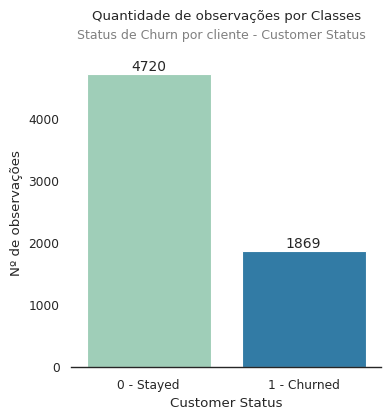

<Figure size 768x576 with 0 Axes>

In [165]:
VisualizationFunctions.qnt_obs_per_class(df_churn_filtered, 'Status de Churn por cliente', TARGET, TARGET_LABEL)

In [179]:
num_features = df_churn_filtered.select_dtypes(include=np.number).columns.tolist()
cat_features = df_churn_filtered.select_dtypes(exclude=np.number).columns.tolist()

num_features.remove(TARGET)

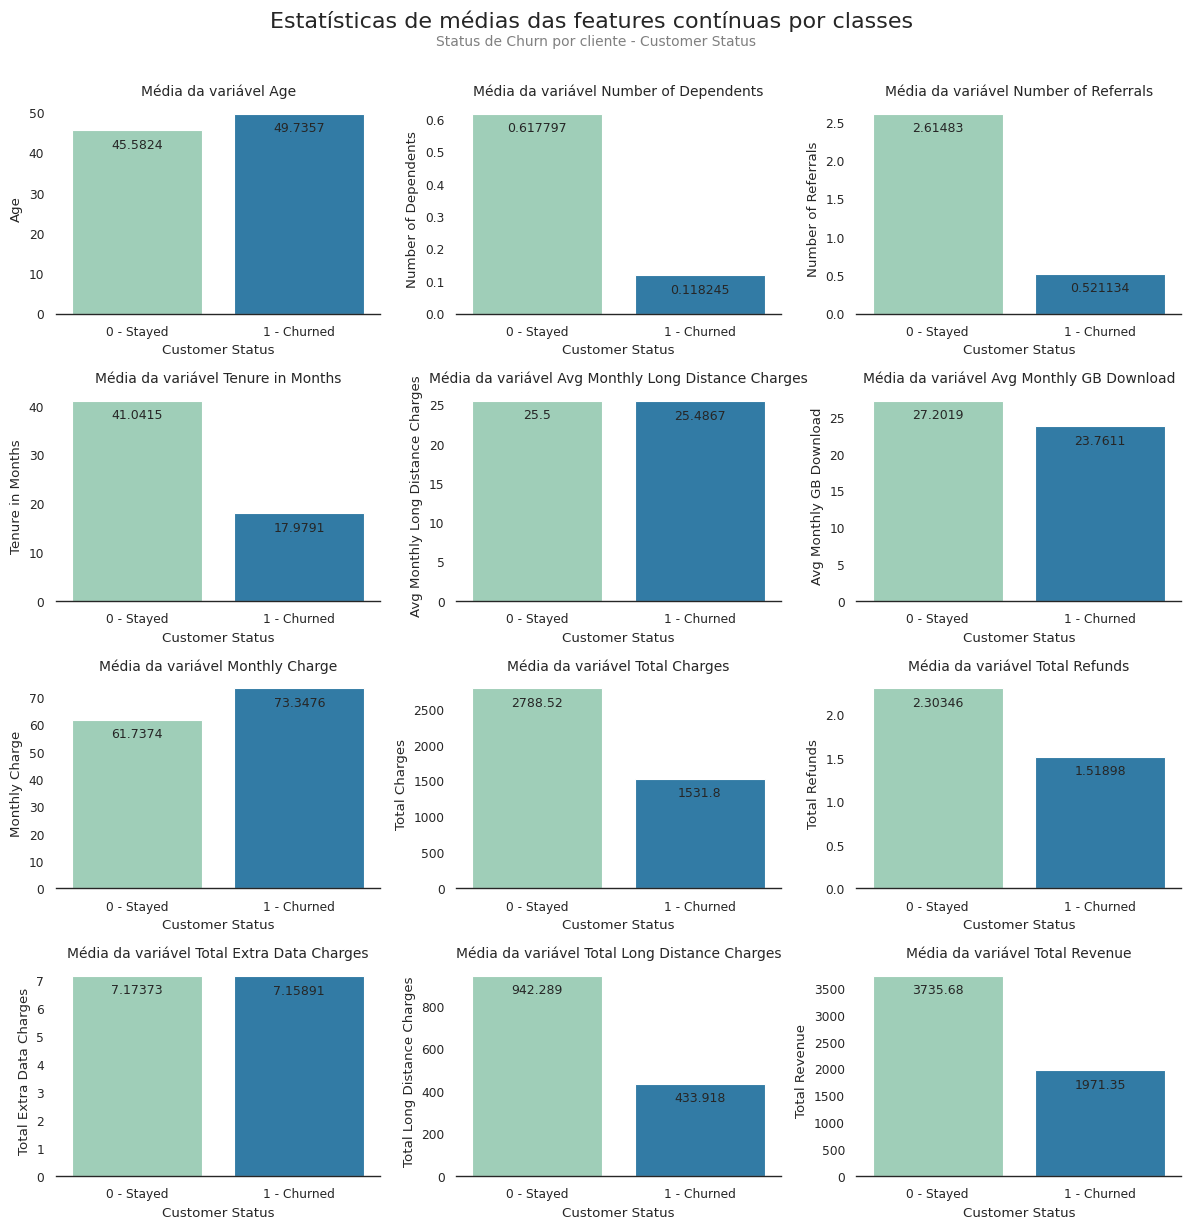

<Figure size 768x576 with 0 Axes>

In [183]:
VisualizationFunctions.cont_features_mean_per_target_class(df_churn_filtered, 'Status de Churn por cliente', num_features, TARGET, TARGET_LABEL)

In [ ]:
n = len(num_features)
part_size = n // 4

num_features_1 = num_features[:part_size]
num_features_2 = num_features[part_size:2*part_size]
num_features_3 = num_features[2*part_size:3*part_size]
num_features_4 = num_features[3*part_size:]

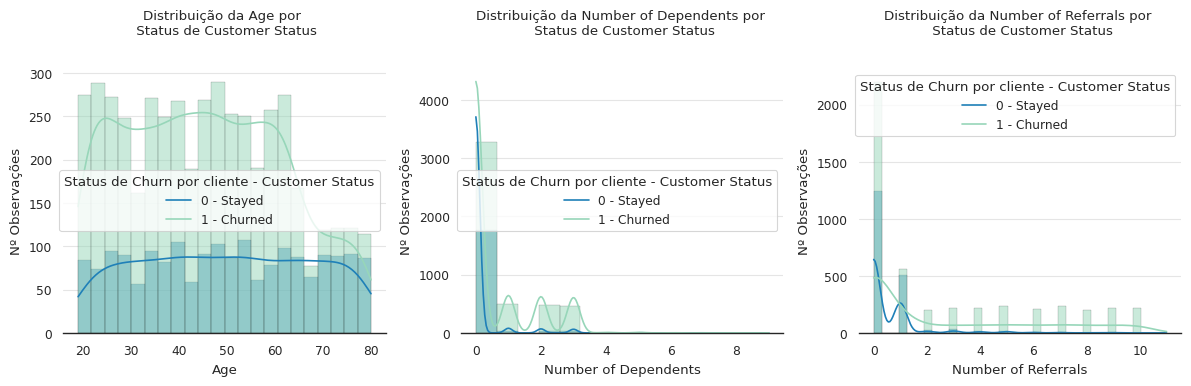

<Figure size 768x576 with 0 Axes>

In [187]:
VisualizationFunctions.dist_cont_per_target_class(df_churn_filtered, 'Status de Churn por cliente', num_features_1, TARGET, TARGET_LABEL)

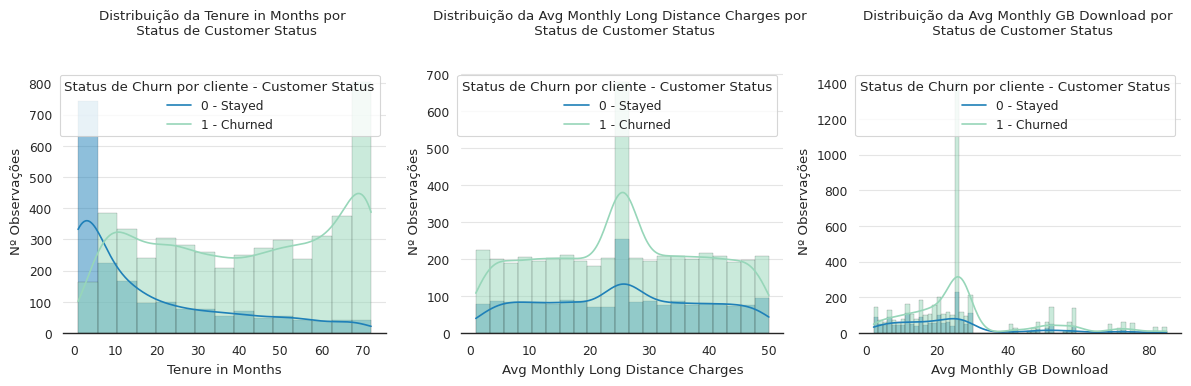

<Figure size 768x576 with 0 Axes>

In [188]:
VisualizationFunctions.dist_cont_per_target_class(df_churn_filtered, 'Status de Churn por cliente', num_features_2, TARGET, TARGET_LABEL)

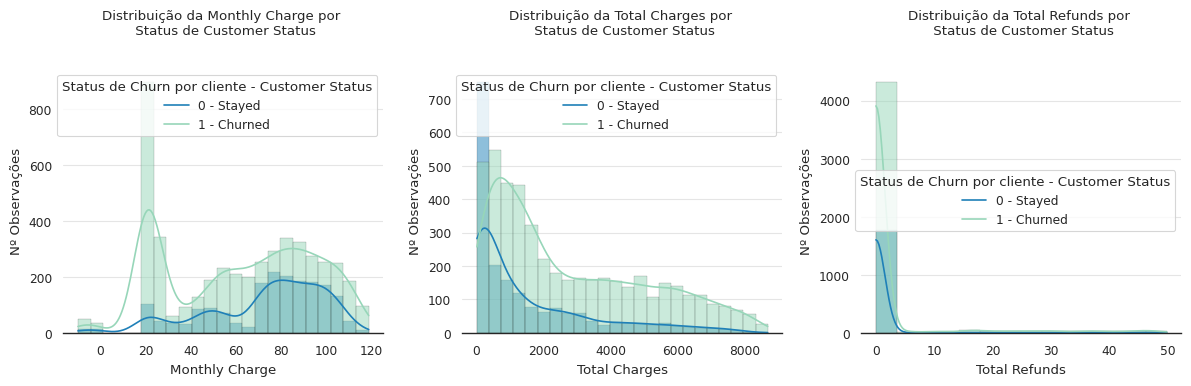

<Figure size 768x576 with 0 Axes>

In [189]:
VisualizationFunctions.dist_cont_per_target_class(df_churn_filtered, 'Status de Churn por cliente', num_features_3, TARGET, TARGET_LABEL)

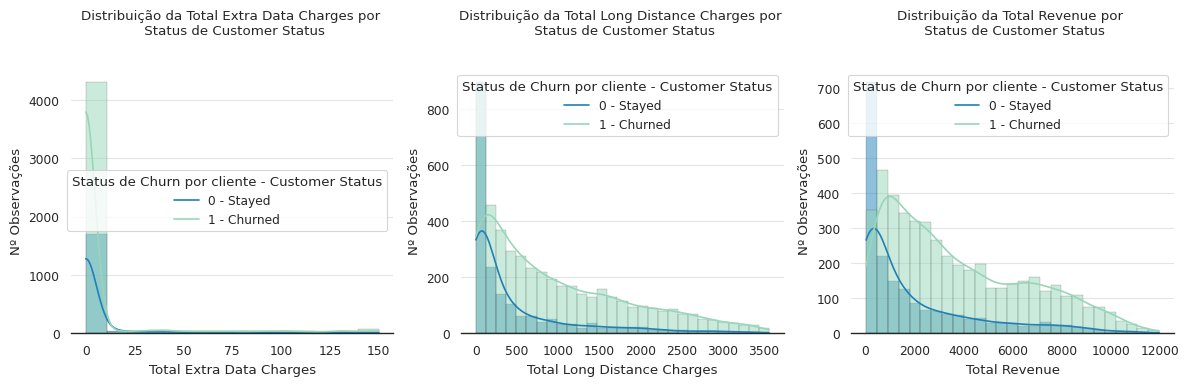

<Figure size 768x576 with 0 Axes>

In [ ]:
VisualizationFunctions.dist_cont_per_target_class(df_churn_filtered, 'Status de Churn por cliente', num_features_4, TARGET, TARGET_LABEL)

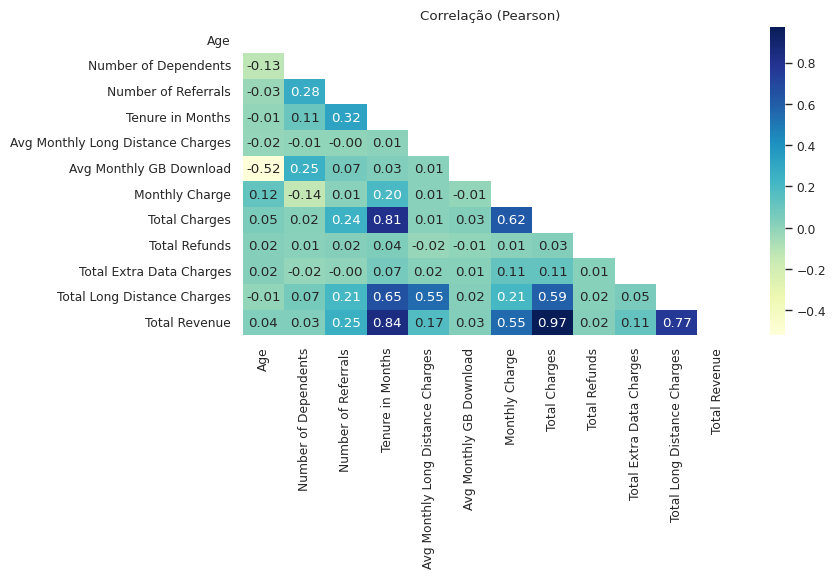

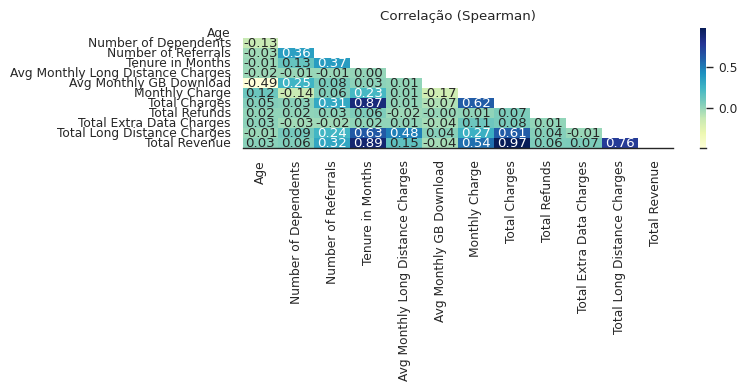

<Figure size 768x576 with 0 Axes>

In [197]:
VisualizationFunctions.correlation_plot(df_churn_filtered[num_features], ['pearson', 'spearman'])

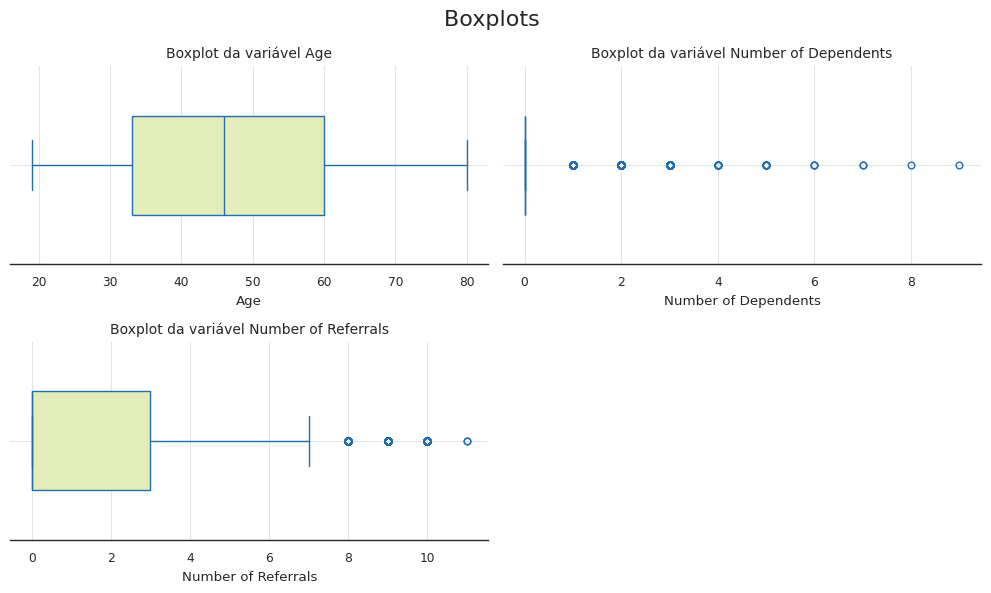

<Figure size 768x576 with 0 Axes>

In [200]:
VisualizationFunctions.outliers_plot(df_churn_filtered, num_features_1)

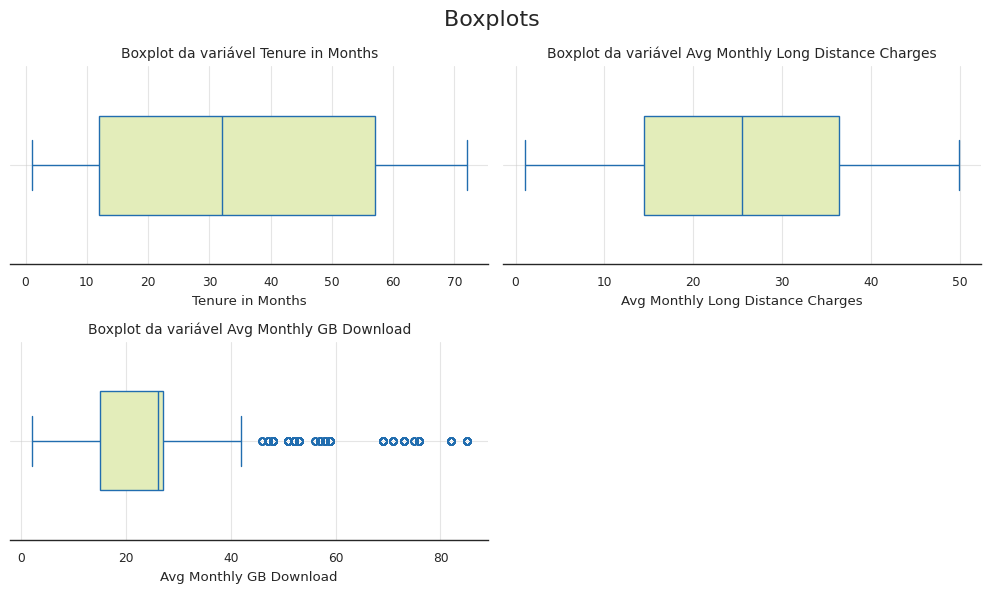

<Figure size 768x576 with 0 Axes>

In [201]:
VisualizationFunctions.outliers_plot(df_churn_filtered, num_features_2)

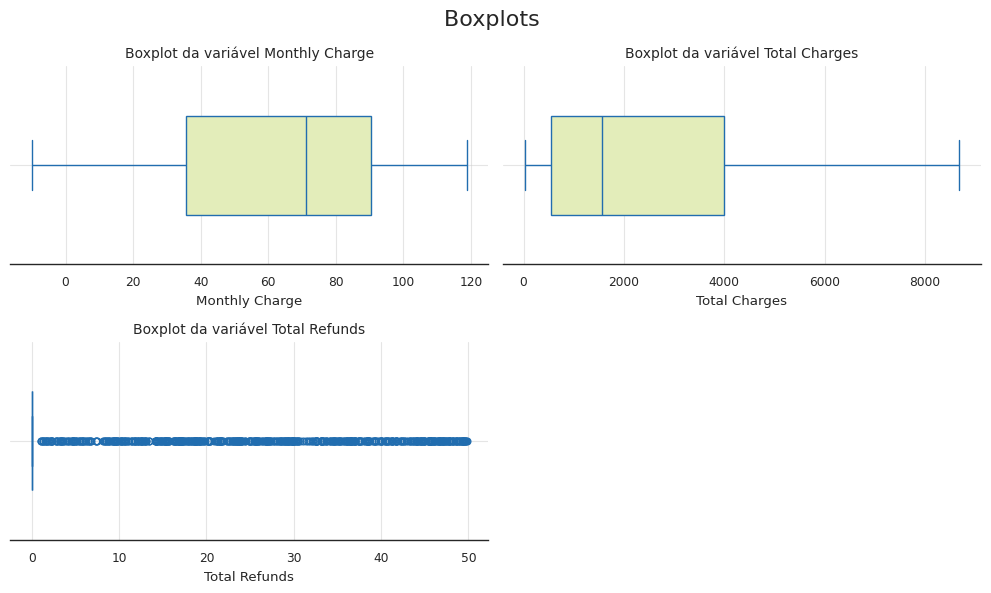

<Figure size 768x576 with 0 Axes>

In [202]:
VisualizationFunctions.outliers_plot(df_churn_filtered, num_features_3)

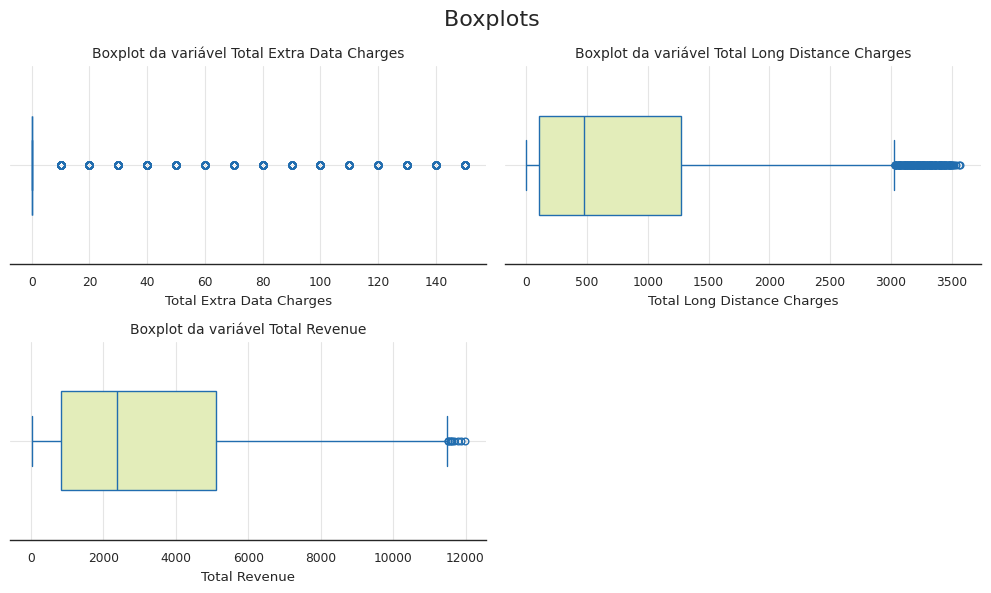

<Figure size 768x576 with 0 Axes>

In [203]:
VisualizationFunctions.outliers_plot(df_churn_filtered, num_features_4)